# Dimensionality Reduction and Clustering with MNIST

In this project I use a variety of dimensionality reducation and clustering techniques to visualize and group a data set of images. The images are 28 by 28 pixel representations of numbers.

The following methods are used
1. PCA (Dimensionality Reducation)
2. T-SNE (Visualizing high dimensional data)
3. K-means Clustering
4. Hierarchical Clustering (Dendrogram visual)

In [17]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version = 1, return_X_y=True)

## Getting Started

The first step in any data project is understanding what the data set contains, in this case I print the first observation of the array from the data, which happens to be another array. The array contains numbers that seem to range from 0-264.

In [2]:
X[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Plotting the array into an image using grayscale, a pixelated number appears. The one below looks like a 9.

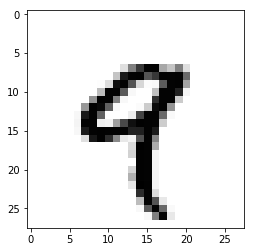

In [3]:
plt.imshow(X[4].reshape((28,28)), cmap='Greys')

The y values provided with the data contain labels for each image in the data set, below we see that the image above is labeled as a nine. Looks good.

In [4]:
y[4]

'9'

In [51]:
y_df = pd.DataFrame(y)

In [52]:
y_df['target'] = pd.DataFrame(y)

The data looks pretty well balanced in this data set which is good for our applications, in order to visualize all of the classes.

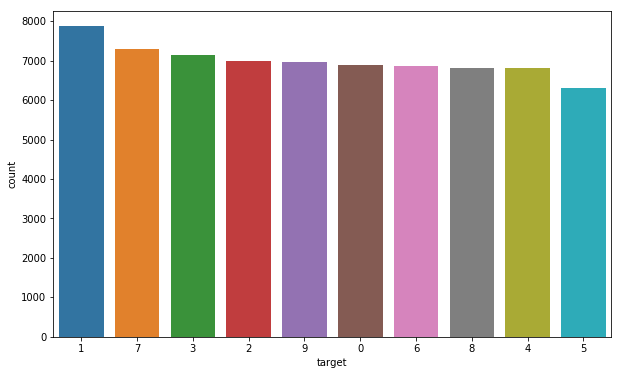

In [55]:
f, ax = plt.subplots(figsize=(10,6))
sns.countplot(x = 'target', 
                  data = y_df,
                  order = y_df.target.value_counts(ascending=False).index)

In [11]:
print(y.shape)
print(X.shape)

(70000,)
(70000, 784)


## Principle Compenent Analysis (PCA)

This tool is used to reduce dimensionality in cases where there are many features in a model. In the case of this problem there are 784 possible features, meaning the data currently exists in a 784 dimensional space. This high dimensionality can be a problem for some models, casing them to run slow. 

PCA is a way to reduce the dimensionality, or take features away, while preserving the highest variance. The first principal component is the axis that maximizes the variance in the data. Orthoganal to the first component, the second principal component is the axis that preserves the second highest variance, and so on for n principle components.

In order to use PCA, it is important to understand the trade off between reducing dimeensionality, and loosing information. Choose an n that is too small and risk having low explained variance. Choose an n that is too high then there is less dimensionality reducation and the PCA is not useful.

1)a. Below I plot a graph showing the relationship between the number of principal components and the explained variance in our data. As the number of components increase the explained ration of the data also increases. In order to decide on a number of principal compenents I shot for an explained variance of about 80%. The actual n that returns 80% explained variance in this case is 42.

Text(0.5, 1.0, 'Relationship Explained Variance and Components')

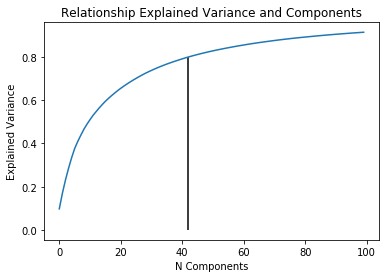

In [49]:
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[42],x=42)
plt.ylabel('Explained Variance')
plt.xlabel('N Components')
plt.title('Relationship Explained Variance and Components')

In [46]:
index_80 = np.argmax(cum_ratio >= 0.80)
print(index_80)
print(cum_ratio[index_80])

42
0.8001734770776181


The new matrix generated by the PCA will maintain a lot of the information in the data, while significantly reducing the number of features (784 down to 42)

In [60]:
pca = PCA(n_components=42)
data_pca = pca.fit_transform(X)

1)d.
After fitting the model I replotted the 9 from earlier. The PCA does not preserve the quality of the image, the plot below has significantly less pixels, and does not resemple a nine at all. It is important to highlight here that PCA is not loss-less compression.

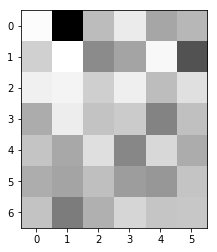

In [63]:
plt.imshow(data_pca[4].reshape((7,6)), cmap='Greys')

In [15]:
pca = PCA(n_components = 2)  # project from 784 to 2 dimensions
pca_2d = pca.fit_transform(X)
print("Shape before PCA: ", X.shape)
print("Shape after PCA: ",pca_2d.shape)

Shape before PCA:  (70000, 784)
Shape after PCA:  (70000, 2)


In [25]:
y = y.astype(int)

1)b. Below I plot the output of the first two principal components color coded with the labels from the data. Already we can see that their are differences in higher dimensions that come through even in two dimensions.

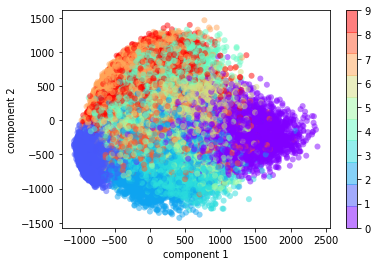

In [26]:
#Plotting the components in two dimensions
plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c = y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

1)c. PCA is a helpful algorithm for circumstances where you want to take away features wwhile sacrificing as little information as possible. However, there are not a lot of models in data science that suffer heavily from high dimensionality. The models that suffer the most are models that use euclidean distance such as K nearest neighbor.

## t-SNE

t-SNE is primarily used as a visualization tool. The algorithm projects datapoints from higher dimensions into lower dimensions (normally 2D) while preserving a balance of local and gloabl distances between the points. In this case we will first reduce the number of features using PCA, to 50 features, then let t_sne output the datapoints in 2 dimensions.

In [27]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.053s...
[t-SNE] Computed neighbors for 10000 samples in 13.083s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 364.180029
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.460106
[t-SNE] KL divergence after 1000 iterations: 1.679902


In [30]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

2)a. Plotting the results of t-SNE, right off the bat, the clusters are much more pronounced than PCA. The PCA plot was much more scattered, with overlapping clusters, the plot below is pretty clearly seperated. One interesting result is the similarity between the 4s and 9s which even to the human eye appear to be very similar. I imagine that this is the most difficult class to predict accurately.

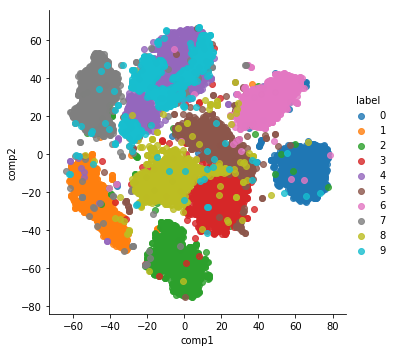

In [32]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

2)b. Below I check different values of perplexity. Perplexity is the balance between local and global distances. Depending on the data, changing perplexity can have a large impact on the seperation and clustering. It is important to note that the density of the clusters and distances between clusters are not very meaningful. The reccomended perplexity is between 5 and 50. The first t-SNE plot has perplexity 50, the plot below has perplexity 5. A perplexity ov one however, just gives back noise.

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.047s...
[t-SNE] Computed neighbors for 10000 samples in 16.066s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 238.136721
[t-SNE] KL divergence after 250 iterations with early exaggeration: 96.323654
[t-SNE] KL divergence after 1000 iterations: 1.934564


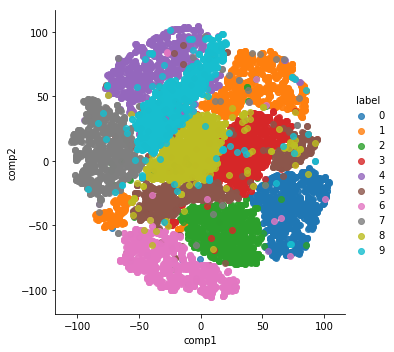

In [34]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results_5 = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne_5 = pd.DataFrame(tsne_results_5, columns=['comp1', 'comp2'])
df_tsne_5['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne_5, hue='label', fit_reg=False)

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.121s...
[t-SNE] Computed neighbors for 10000 samples in 33.802s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 81.951417
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.465294
[t-SNE] KL divergence after 1000 iterations: 1.950954


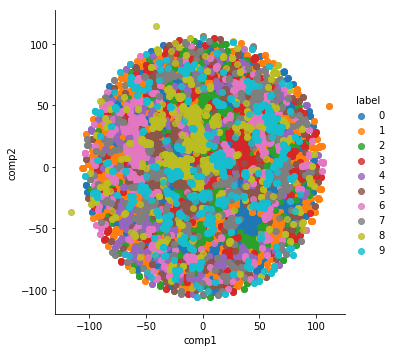

In [64]:
tsne = TSNE(n_components=2, verbose=1, perplexity=1, n_iter=1000, learning_rate=200)
tsne_results_5 = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne_5 = pd.DataFrame(tsne_results_5, columns=['comp1', 'comp2'])
df_tsne_5['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne_5, hue='label', fit_reg=False)

2)c. Changing the learning rate and the number of iterations had a little effect on the clustering. The seperation between clusters is more distinct with more iterations, but even with 500 iterations the data is still clustered quite nicely. Changing the learning rate also had a neglible effect on the results, both learning rate of 200, 100, and 10 all seem to do pretty well. 

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.047s...
[t-SNE] Computed neighbors for 10000 samples in 19.908s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 238.136721
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.531105
[t-SNE] KL divergence after 5000 iterations: 1.562538


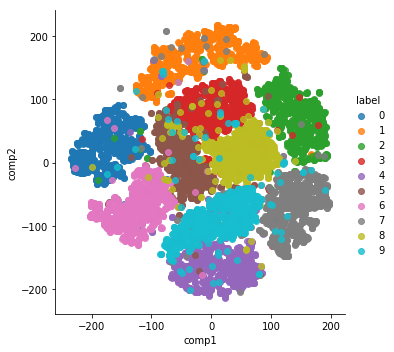

In [35]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=5000, learning_rate=200)
tsne_results_6 = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne_6 = pd.DataFrame(tsne_results_6, columns=['comp1', 'comp2'])
df_tsne_6['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne_6, hue='label', fit_reg=False)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.070s...
[t-SNE] Computed neighbors for 10000 samples in 21.187s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 238.136721
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.467041
[t-SNE] KL divergence after 500 iterations: 2.508844


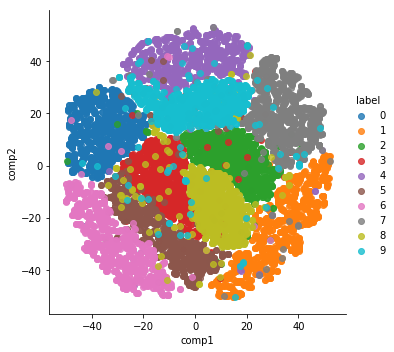

In [36]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=500, learning_rate=200)
tsne_results_7 = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne_7 = pd.DataFrame(tsne_results_7, columns=['comp1', 'comp2'])
df_tsne_7['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne_7, hue='label', fit_reg=False)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.047s...
[t-SNE] Computed neighbors for 10000 samples in 18.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 238.136721
[t-SNE] KL divergence after 250 iterations with early exaggeration: 99.538208
[t-SNE] KL divergence after 1000 iterations: 2.861177


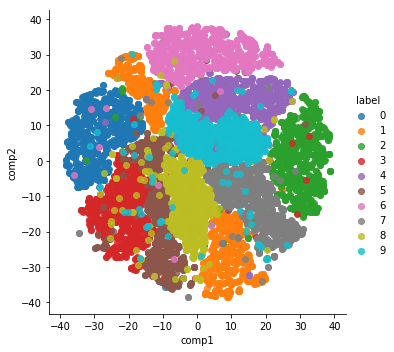

In [41]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=10)
tsne_results_8 = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne_8 = pd.DataFrame(tsne_results_8, columns=['comp1', 'comp2'])
df_tsne_8['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne_8, hue='label', fit_reg=False)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.053s...
[t-SNE] Computed neighbors for 10000 samples in 18.170s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 238.136721
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.457130
[t-SNE] KL divergence after 1000 iterations: 1.989105


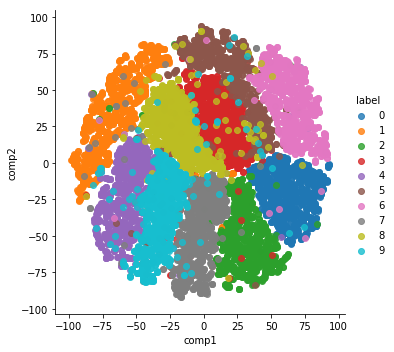

In [42]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=100)
tsne_results_9 = tsne.fit_transform(X_pca[rows[:n_select],:])
df_tsne_9 = pd.DataFrame(tsne_results_9, columns=['comp1', 'comp2'])
df_tsne_9['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne_9, hue='label', fit_reg=False)

## K-means Clustering

K means clustering is a way to cluster unlabeled data into similar groups. The most important hyper parameter for this algorithm is k, or the number of clusters. 

3)a. In our case we are grouping together numbers 0-9 so there should be 10 distinct clusters.

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

3)b. I used the silhouette score to evaluate the clustering. This score is the mean distance between the sample point and all other points in the nearest cluster, subtracted by the mean distance between the sample point and all other points in the same class. 

In [95]:
subX = X[:1000]
suby = y[:1000]
kmeans_model = KMeans(n_clusters=10, n_init=50).fit(subX)
labels = kmeans_model.labels_

3)d. I decided not to scale the data because all of the values in the data set fall within the same range, so there shouldn't be any issues with inequal representaion of distances

## Hierarchical Clustering
This is another clustering algorithm that approaches the problem in a way that does not need k values. Hierarchical clustering puts each points into its own cluster then merges the closest two clusters until there is only one large cluster left containing all of the data points. Since this approach is quite intensive, I will show an example on only a portion of the data. This will also help with visualization in the dendrogram below.

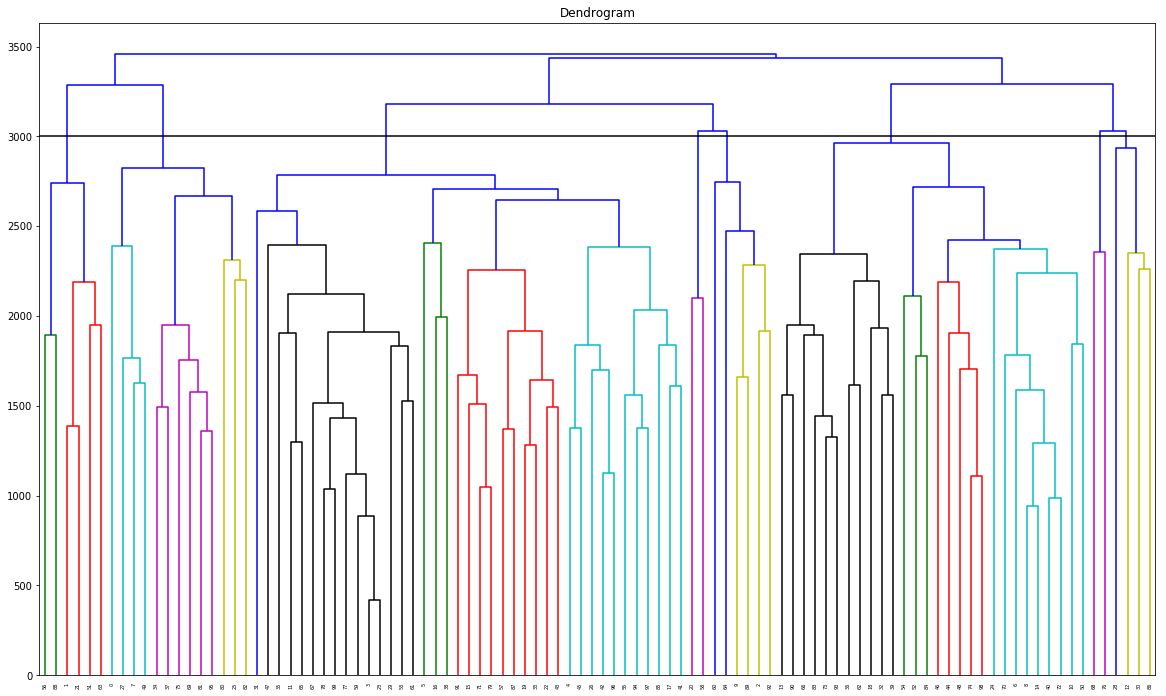

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage
subX = X[:100]
Z = linkage(subX, 'complete')
plt.figure(figsize=(20, 12))
_ = dendrogram(Z)
plt.title('Dendrogram')
plt.hlines(xmin = 0, xmax = 9999, y=3000)

4)b. The dendrogram above shows the number of clusters at different layers. There seems to be a natural break in the dendrogram around 3000, suggesting about 8 classes.

4)c. Testing out other linkage methods, the complete method seemed to have faired the best. The average and single methods do not work very well in this application. However, the ward strategy did fairly well, suggesting 7 or 8 clusters.

Text(0.5, 1.0, 'Dendrogram')

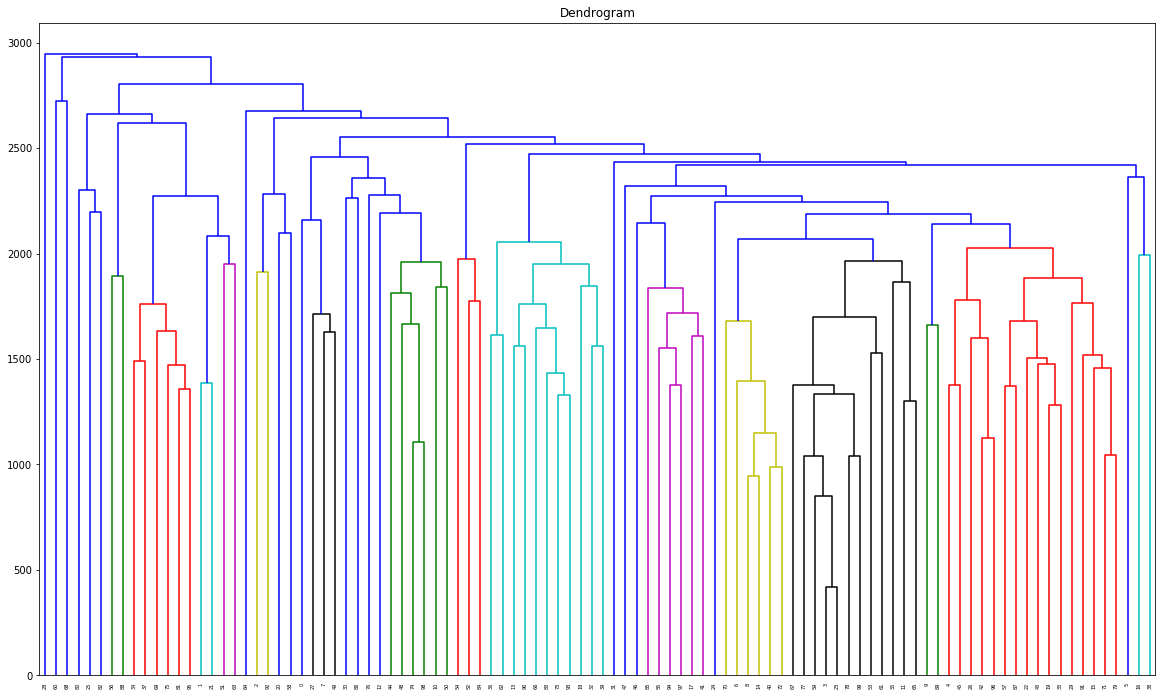

In [81]:
Z = linkage(subX, 'average')
plt.figure(figsize=(20, 12))
_ = dendrogram(Z)
plt.title('Dendrogram')

Text(0.5, 1.0, 'Dendrogram')

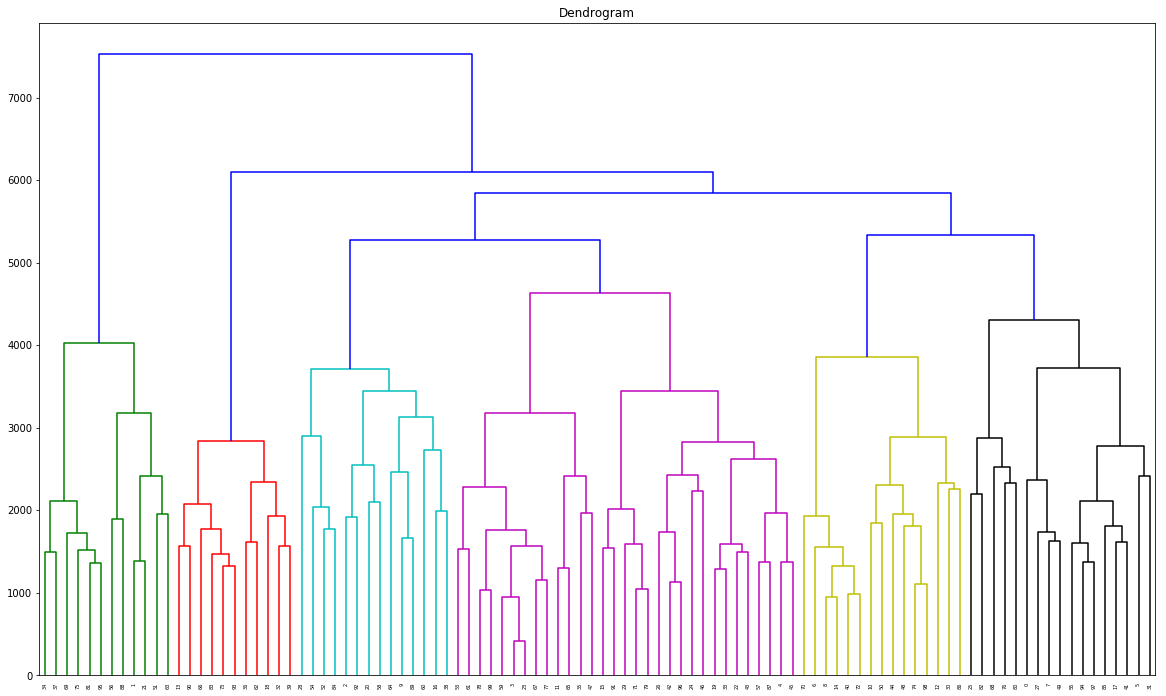

In [83]:
Z = linkage(subX, 'ward')
plt.figure(figsize=(20, 12))
_ = dendrogram(Z)
plt.title('Dendrogram')

Text(0.5, 1.0, 'Dendrogram')

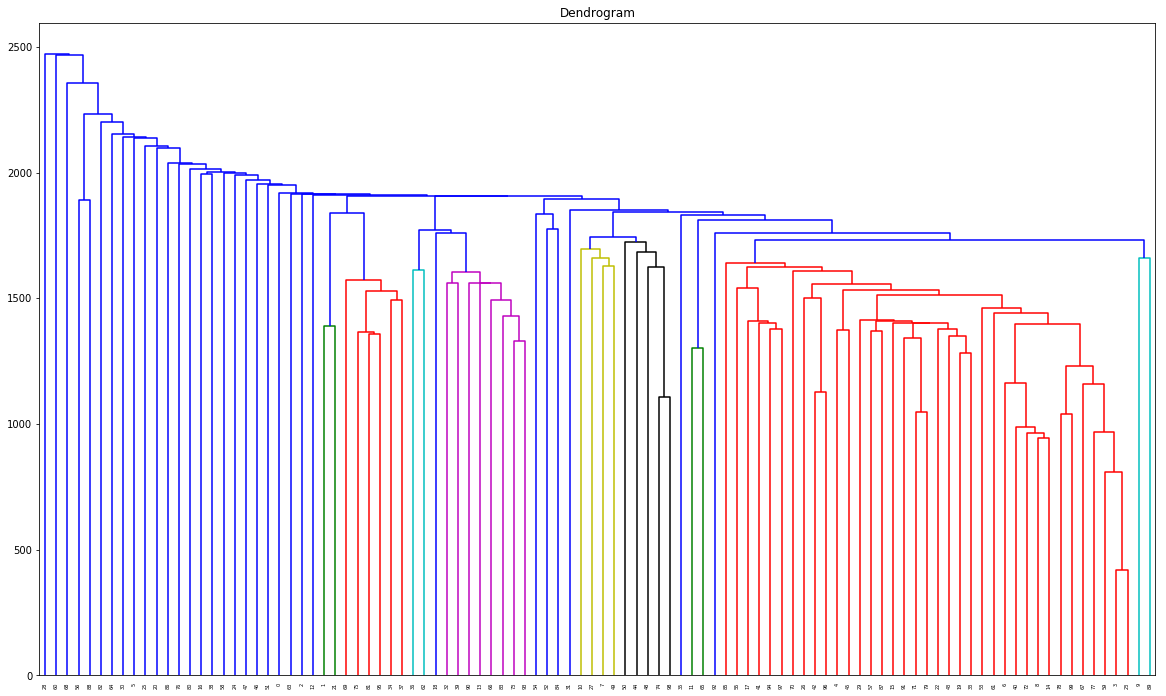

In [84]:
Z = linkage(subX, 'single')
plt.figure(figsize=(20, 12))
_ = dendrogram(Z)
plt.title('Dendrogram')